In [108]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
%matplotlib inline

In [109]:
train = pd.read_csv('IMFDB_final\\dataset part1.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Image,Emotion
0,Gajarajayogam_Mamukkoya_1.jpg,DISGUST
1,Gajarajayogam_Mamukkoya_11.jpg,HAPPINESS
2,Gajarajayogam_Mamukkoya_12.jpg,HAPPINESS
3,Gajarajayogam_Mamukkoya_13.jpg,HAPPINESS
4,Gajarajayogam_Mamukkoya_14.jpg,HAPPINESS


In [110]:
train.columns

Index(['Image', 'Emotion'], dtype='object')

In [111]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:\\Users\\minij\\Desktop\\Emotion Detection\\IMFDB_final\\images\\'+str(train['Image'][i]),target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 998/998 [00:30<00:00, 32.21it/s]


In [112]:
X.shape

(998, 400, 400, 3)

In [127]:
from keras.utils import to_categorical
y = train.drop(['Image'],axis=1)
y.shape
le=LabelEncoder()
ds=y.apply(le.fit_transform)
y=np.array(ds)
print(np.unique(y))
print(le.inverse_transform([0,1,2,3,4,5,6]))
y=to_categorical(y)
print(y.shape)

[0 1 2 3 4 5 6]
['ANGER' 'DISGUST' 'FEAR' 'HAPPINESS' 'NEUTRAL' 'SADNESS' 'SURPRISE']
(998, 7)


[0 1 2 3 4 5 6]
['ANGER' 'DISGUST' 'FEAR' 'HAPPINESS' 'NEUTRAL' 'SADNESS' 'SURPRISE']

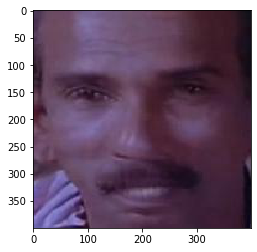

In [128]:
plt.imshow(X[2])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [134]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 93, 93, 64)        51264     
__________

In [136]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [137]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
#model.fit(X_train, y_train, epochs=10, batch_size=16)

Train on 898 samples, validate on 100 samples
Epoch 1/10
898/898 [==============================] - ETA: 17:32 - loss: 1.9660 - acc: 0.17 - ETA: 11:43 - loss: 2.3712 - acc: 0.17 - ETA: 9:39 - loss: 2.2426 - acc: 0.1615 - ETA: 7:49 - loss: 2.1593 - acc: 0.171 - ETA: 6:44 - loss: 2.1099 - acc: 0.178 - ETA: 5:49 - loss: 2.0678 - acc: 0.192 - ETA: 4:55 - loss: 2.0423 - acc: 0.189 - ETA: 4:03 - loss: 2.0302 - acc: 0.185 - ETA: 3:20 - loss: 2.0168 - acc: 0.185 - ETA: 2:39 - loss: 1.9986 - acc: 0.187 - ETA: 1:58 - loss: 1.9820 - acc: 0.194 - ETA: 1:22 - loss: 1.9718 - acc: 0.196 - ETA: 42s - loss: 1.9634 - acc: 0.193 - ETA: 1s - loss: 1.9515 - acc: 0.1920 - 688s 766ms/step - loss: 1.9517 - acc: 0.1927 - val_loss: 1.8574 - val_acc: 0.2500
Epoch 2/10
898/898 [==============================] - ETA: 2:56 - loss: 1.7831 - acc: 0.250 - ETA: 2:34 - loss: 1.7770 - acc: 0.250 - ETA: 2:40 - loss: 1.7720 - acc: 0.250 - ETA: 2:49 - loss: 1.7858 - acc: 0.238 - ETA: 2:36 - loss: 1.7756 - acc: 0.256 - ETA: 

KeyboardInterrupt: 

In [87]:
#model.save('my_model.h5')

In [122]:
model.evaluate(X_test, y_test)

100/100 [==============================] - ETA:  - ETA:  - ETA:  - 5s 51ms/step


[-22.159915924072266, 0.25]

In [ ]:
img = image.load_img('C:\\Users\\minij\\Desktop\\Emotion Detection\\IMFDB_final\\images\\Aaradhana_RajeshKhanna_102.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [121]:
#classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[1.]]


[14 18  4 15 17 10  1 13  6 12 16  5  7  3 11  2  9  8  0]
Drama (1.0)
History (7.87e-10)
Animation (2.6e-10)


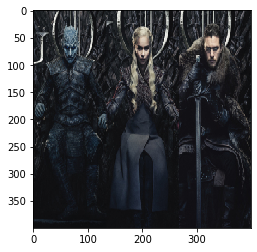

In [31]:
print(np.argsort(proba[0]))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]%18])+" ({:.3})".format(proba[0][top_3[i]%18]))
plt.imshow(img)
#print(type(top_3))

In [51]:
'''
def append_ext(fn):
    return fn+".jpg"

X["imdbId"]=X["imdbId"].apply(append_ext)
y["imdbId"]=y["imdbId"].apply(append_ext)

train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory="./test/",
x_col="id",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))




filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append('0')
    else:
        categories.append('1')
'''


'\ndef append_ext(fn):\n    return fn+".jpg"\n\nX["imdbId"]=X["imdbId"].apply(append_ext)\ny["imdbId"]=y["imdbId"].apply(append_ext)\n\ntrain_generator=datagen.flow_from_dataframe(\ndataframe=train,\ndirectory="./",\nx_col="id",\ny_col="label",\nsubset="training",\nbatch_size=32,\nseed=42,\nshuffle=True,\nclass_mode="categorical",\ntarget_size=(32,32))\n\ntest_generator=test_datagen.flow_from_dataframe(\ndataframe=testdf,\ndirectory="./test/",\nx_col="id",\ny_col=None,\nbatch_size=32,\nseed=42,\nshuffle=False,\nclass_mode=None,\ntarget_size=(32,32))\n\n\n\n\nfilenames = os.listdir(original_train)\ncategories = []\nfor filename in filenames:\n    category = filename.split(\'.\')[0]\n    if category == \'cat\':\n        categories.append(\'0\')\n    else:\n        categories.append(\'1\')\n'

In [53]:
newmodel=load_model('my_model.h5')
arr=np.array([])
img = image.load_img('tiu.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
proba = newmodel.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]%18])+" ({:.3})".format(proba[0][top_3[i]%18]))
print(proba.shape)

Drama (1.0)
Sci-fi (1.0)
Romance (1.0)
(1, 19)


In [62]:
filenames = os.listdir('TIUFrames')
probabilities=[]

for filename in filenames:
    img = image.load_img('TIUFrames/'+filename,target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    proba = newmodel.predict(img.reshape(1,400,400,3))
    probabilities.append(proba[0])
    
sums=np.sum(probabilities, axis=0)
top3=np.argsort(sums)[-4:-1]

for i in range(3):
    print("{}".format(classes[top_3[i]%18])+" ({:.3})".format(proba[0][top_3[i]%18]))

Drama (1.0)
Sci-fi (1.0)
Romance (1.0)
